## Sistemas de Inteligencia Artificial
### TP0: Introducción al Análisis de Datos
###### Primer Cuatrimestre 2023
#### Introducción

El objetivo de este TP es evaluar una función que depende de varios parámetros de entrada, fundamentando las conclusiones con gráficos pertinentes y explicando la metodología utilizada para llegar a cada una. Para ello será provisto un código fuente que incluye una implementación de dicha función junto con ejemplos de ejecución.
#### Función a Evaluar
La función a evaluar es la de captura de un Pokemon, consistente en dos parámetros de entrada: el Pokemon que se está intentando capturar y el tipo de pokebola que se pretende utilizar. La misma retorna un valor booleano correspondiente al resultado del intento de captura.
El éxito de la captura depende del estado en el que se encuentre el Pokemon y del tipo de pokebola que se utilice. Además, algunos Pokemones son intrínsecamente más fáciles de capturar que otros. Para evaluar la función correctamente se deberan probar varias configuraciones de entrada y analizar los resultados correspondientes.
#### Contexto
Pokemon es una franquicia de videojuegos donde el jugador se dedica a armar un pequeño equipo de monstruos (llamados pokemones), entrenarlos peleando contra otros pokemones con el objetivo de convertirse en el mejor entrenador de pokemones de la región. Para conseguir estos pokemones el jugador tiene que explorar el medio salvaje donde estos habitan, pelear contra ellos y finalmente capturarlos utilizando herramientas particulares llamadas pokebolas.
#### Archivos Provistos
Toda la implementación provista se encuentra hecha en Python y contiene lo necesario para poder ejecutar la función y evaluar sus resultados.
### pokemon.py
Modelo de un Pokemon y la implementación de un PokemonFactory para generar nuevos Pokemones. Cada Pokemon cuenta con propiedades que son constantes e inmutables para todos los miembros de la especie y otras que son mutables y corresponden al estado actual de la instancia.
###### Propiedad Tipo Descripción
* current hp int Vida actual (Min: 0)
* level int Nivel de experiencia (Min: 1, Max: 100)
* status effect Enum(StatusEffect) Condición de salud
### pokeball.py
Modelo genérico de una pokebola y la implementación concreta de 4 pokebolas distintas:
“PokeBall”, “UltraBall”, “FastBall” y “HeavyBall”.
### pokemon.json
Archivo con los parámetros inmutables de 5 especies distintas de Pokemones. Cada Pokemon cuenta con las siguientes propiedades inmutables:
###### Propiedad Tipo Descripción
* type string[2] Especie de Pokemon (Ej: [ROCK”, ”FIRE”] o [”FIRE, ”NONE”] )
* stats int[6] [base hp, attack, defense, Sp. attack, Sp. defense, speed]
* wieght float Peso del Pokemon
* catch rate int Dificultad de captura. (Min: 0, Max: 255)

### catching.py
Implementación de la función attempt_catch que es la *función a evaluar*.
* Input: Pokemon a capturar y el tipo de pokebola a utilizar
* Output: un valor de tipo boolean (attempt success) que indica si el Pokemon fue capturado o no y otro valor de tipo float (capture rate) que indica la probabilidad de que el pokemon sea capturado, dependiendo de un valor aleatorio.


## Integrantes
+ Baquero Suárez Mauro
+ Biolley Calvo, Lucas Miguel
+ Peñaloza, Dario Alejandro
+ Perez Mosquera, Mariano

In [12]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns

from src.catching import attempt_catch
from src.pokemon import PokemonFactory, StatusEffect

### Preguntas Guía
Se desea evaluar qué factores influyen en la captura de un Pokemon teniendo en cuenta los parámetros inmutables del mismo junto con la pokebola utlizada. Para ello se deberán generar distintos gráficos que representen las respuestas a las siguientes preguntas guía:

1. Acerca de pokebolas:
- a). Ejecutando la función 100 veces, para cada Pokemon en condiciones ideales (HP:100 %, LVL 100) ¿Cuál es la probabilidad de captura promedio para cada pokebola?

In [13]:
import json

factory = PokemonFactory("pokemon.json")
with open("pokemon.json", "r") as c:
            pokemon_db = json.load(c) 
pokemons = pokemon_db.keys()

In [14]:
#pokeball_catch_rate     #Tiene fijo status y hp
pokeball_catch_rate = pd.DataFrame(columns=[])
for pokemon_name in pokemons:
    pokemon = factory.create(pokemon_name, 100, StatusEffect.NONE, 1)
    for _ in range(100):
        catchT1, valor1 = attempt_catch(pokemon, "pokeball")
        catchT2, valor2 = attempt_catch(pokemon, "ultraball")
        catchT3, valor3 = attempt_catch(pokemon, "fastball")
        catchT4, valor4 = attempt_catch(pokemon, "heavyball")
        new_row = {"pokemon_name": pokemon_name, "hp_percentage":1, "pokeball": valor1, "Capturado_pb":catchT1, "ultraball": valor2, "Capturado_ub":catchT2, "fastball": valor3, "Capturado_fb":catchT3, "heavyball": valor4,"Capturado_hb":catchT4  }
        pokeball_catch_rate = pd.concat([pokeball_catch_rate, pd.DataFrame([new_row])], ignore_index=True)
        
columnas_numericas = pokeball_catch_rate.select_dtypes(include=['float64'])     
promedios = columnas_numericas.mean()

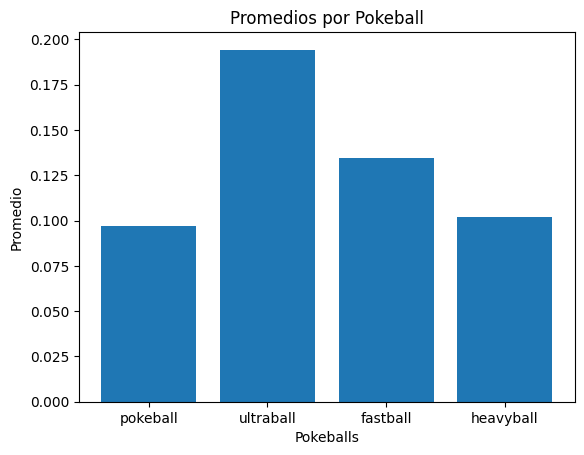

In [15]:
import matplotlib.pyplot as plt
promedios_list = promedios.to_list()
plt.bar(promedios.index, promedios_list)
plt.xlabel('Pokeballs')
plt.ylabel('Promedio')
plt.title('Promedios por Pokeball')
plt.show()

Lo que se observa es que lo general las ultraball tiene mayor promedio de probabilidad de captura.

- b). ¿Es cierto que algunas pokebolas son más o menos efectivas dependiendo de propiedades intrínsecas de cada Pokemon? Justificar.
Sugerencia: Comparar efectividad (success/total attemps) como proporción de la efectividad de la Pokebola básica para cada Pokemon.

In [16]:
# Filtrar las columnas relevantes
columnas_capturado = pokeball_catch_rate[['pokemon_name', 'Capturado_pb', 'Capturado_ub', 'Capturado_fb', 'Capturado_hb']]

# Contar los valores True agrupados por nombre de Pokémon
conteo_por_pokemon = ( columnas_capturado.groupby('pokemon_name').sum() )/100

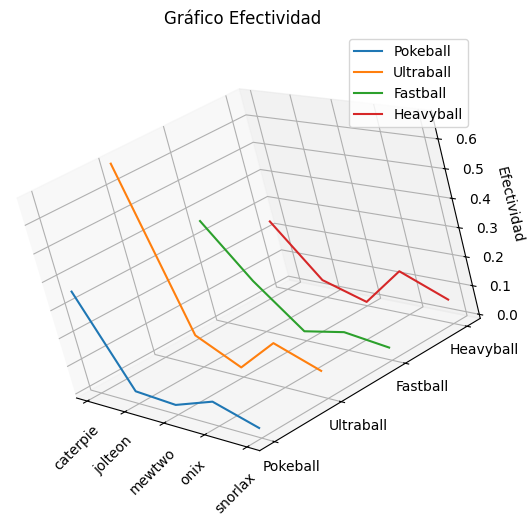

In [17]:
df = pd.DataFrame(conteo_por_pokemon)
# Cambiar nombres de las columnas
nuevos_nombres = {'Capturado_pb': 'Pokeball', 'Capturado_ub': 'Ultraball', 'Capturado_fb': 'Fastball','Capturado_hb': 'Heavyball'}
df = df.rename(columns=nuevos_nombres)

# Crear figura y ejes 3D
fig = plt.figure(figsize=(6, 8))
ax = fig.add_subplot(111, projection='3d')

# Configurar etiquetas de los ejes
x_labels = df.index.tolist()
y_labels = df.columns.tolist()

# Agregar líneas para cada serie de datos
for i, col in enumerate(df.columns):
    ax.plot(range(len(df)), [i] * len(df), df[col], label=col)

# Configurar etiquetas de los ejes
ax.set_xticks(range(len(df)))
ax.set_xticklabels(x_labels, rotation=45)
ax.set_yticks(range(len(df.columns)))
ax.set_yticklabels(y_labels)

# Configurar etiquetas y título
#ax.set_xlabel('Índices')
#ax.set_ylabel('Columnas')
ax.set_zlabel("Efectividad", labelpad=1)
ax.set_title('Gráfico Efectividad')

# Agregar leyenda
ax.legend()

# Cambiar orientación
ax.view_init(elev=20, azim=-35, roll=15)

# Mostrar el gráfico
#plt.tight_layout()  # Ajustar el diseño para evitar superposición de elementos
plt.show()



Lo que se observa es que la efectividad de cada tipo de pokebola si depende de cual pokemos queremos capturar, dado que las características intrinsecas de cada pokemos es relevante. No es lo mismo querer capturar un caterpie en diferencia a un mewtwo.

2. Acerca del estado del Pokemon:
- a). ¿Las condiciones de salud tienen algún efecto sobre la efectividad de la captura? Si es así, ¿Cúal es más o menos efectiva?

In [18]:
#pokeball_catch_rate2     #Tiene fijo hp y varia status
status = StatusEffect

pokeball_catch_rate2 = pd.DataFrame(columns=[])
for pokemon_name in pokemons:
    for s in status:
        pokemon = factory.create(pokemon_name, 100, s, 1)
        for _ in range(100):
            catchT1, valor1 = attempt_catch(pokemon, "pokeball")
            catchT2, valor2 = attempt_catch(pokemon, "ultraball")
            catchT3, valor3 = attempt_catch(pokemon, "fastball")
            catchT4, valor4 =attempt_catch(pokemon, "heavyball")
            new_row = {"pokemon_name": pokemon_name, "status":s.value[0],"pokeball": valor1, "Capturado_pb":catchT1, "ultraball": valor2, "Capturado_ub":catchT2, "fastball": valor3, "Capturado_fb":catchT3, "heavyball": valor4,"Capturado_hb":catchT4  }
            pokeball_catch_rate2 = pd.concat([pokeball_catch_rate2, pd.DataFrame([new_row])], ignore_index=True)
#pokeball_catch_rate2

In [19]:
# Filtrar las filas con valores True en las columnas de interés
capturado_columns = ['pokemon_name','status','Capturado_pb', 'Capturado_ub', 'Capturado_fb', 'Capturado_hb']
df_capturado = pokeball_catch_rate2[capturado_columns]

# Contar la cantidad de True por cada pokemon_name y status
conteo_status = df_capturado.groupby(['pokemon_name', 'status']).sum() / 100

In [20]:
#para hace la grafica, restablezco los indices a columnas
conteo_status_i = conteo_status.reset_index()


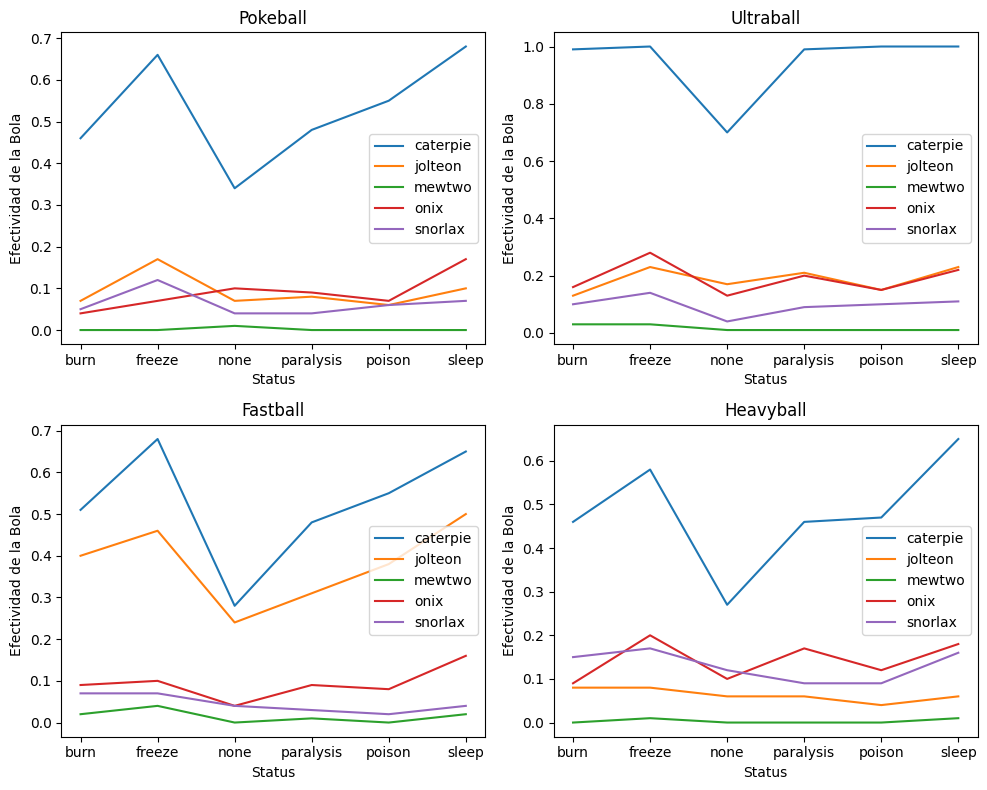

In [21]:
df = pd.DataFrame(conteo_status_i)
df.rename(columns={'Capturado_pb':'Pokeball',	'Capturado_ub':'Ultraball',	'Capturado_fb':'Fastball',	'Capturado_hb':'Heavyball'}, inplace=True)
#['Pokeball',	'Ultraball',	'Fastball',	'Heavyball']
# Crear una matriz de 2x2 con subgráficos
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

for i, ball_type in enumerate(['Pokeball',	'Ultraball',	'Fastball',	'Heavyball']):
    row, col = divmod(i, 2)
    for pokemon in df['pokemon_name'].unique():
        subset = df[df['pokemon_name'] == pokemon]
        axs[row, col].plot(subset['status'], subset[ball_type], label=pokemon)
    axs[row, col].set_xlabel('Status')
    axs[row, col].set_ylabel('Efectividad de la Bola')
    axs[row, col].set_title(f'{ball_type.capitalize()}')
    axs[row, col].legend()

plt.tight_layout()
plt.show()

Lo que se observa en general es que el estado de salud causado por efecto aplicado si varia el valor de la efectividad. En lo particular el intento de captura de  Mewtwo, snorlax y onix no se ve muy afectada por la condición de salud. Y caterpie si se ve muy afectado.

- b). ¿Cómo afectan los puntos de vida a la efectividad de la captura?
Sugerencia: Elegir uno o dos Pokemones y manteniendo el resto de los parámetros constantes, calcular la probabilidad de captura para distintos HP %

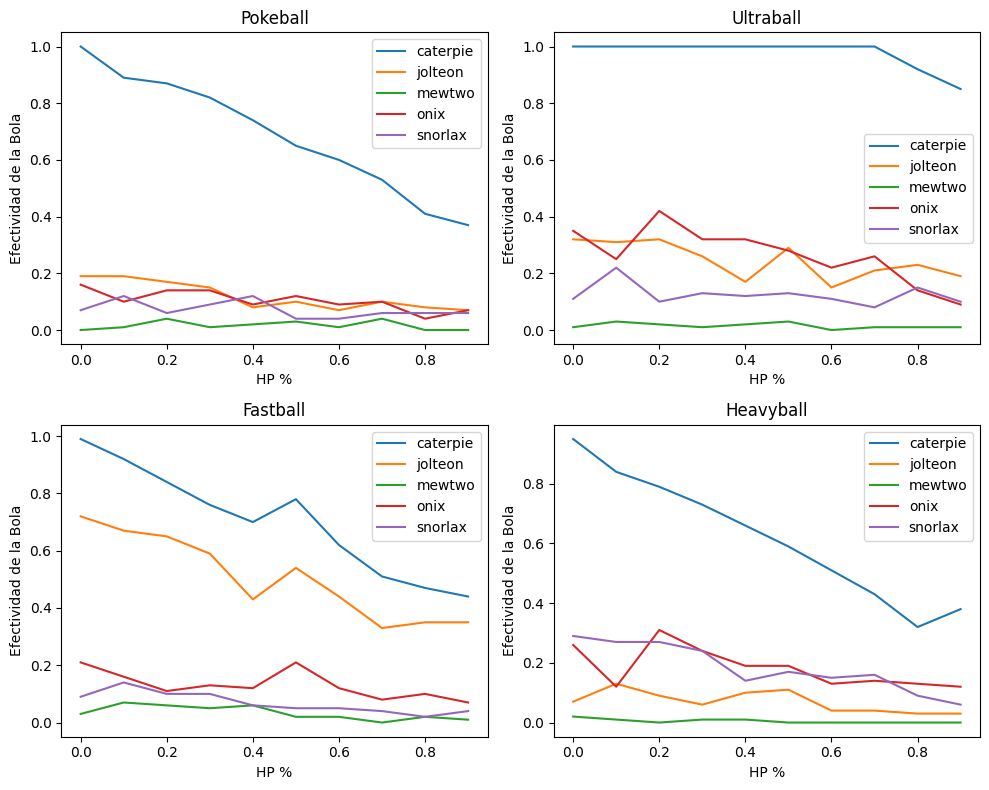

In [22]:
#pokeball_catch_rate3   #Tiene fijo status y varia hp%

pokeball_catch_rate3 = pd.DataFrame(columns=[])
for pokemon_name in pokemons:
    for hp in np.arange(0, 1, 0.1): 
        pokemon = factory.create(pokemon_name, 100, StatusEffect.NONE, hp)
        for _ in range(100):
            catchT1, valor1 = attempt_catch(pokemon, "pokeball")
            catchT2, valor2 = attempt_catch(pokemon, "ultraball")
            catchT3, valor3 = attempt_catch(pokemon, "fastball")
            catchT4, valor4 =attempt_catch(pokemon, "heavyball")
            new_row = {"pokemon_name": pokemon_name, "hp":hp,"pokeball": valor1, "Capturado_pb":catchT1, "ultraball": valor2, "Capturado_ub":catchT2, "fastball": valor3, "Capturado_fb":catchT3, "heavyball": valor4,"Capturado_hb":catchT4  }
            pokeball_catch_rate3 = pd.concat([pokeball_catch_rate3, pd.DataFrame([new_row])], ignore_index=True)

# Filtrar las filas con valores True en las columnas de interés
capturado_columns = ['pokemon_name','hp','Capturado_pb', 'Capturado_ub', 'Capturado_fb', 'Capturado_hb']
df_capturado = pokeball_catch_rate3[capturado_columns]

# Contar la cantidad de True por cada pokemon_name y status
conteo_hp = df_capturado.groupby(['pokemon_name', 'hp']).sum() / 100

#para hace la grafica, restablezco los indices a columnas
conteo_hp_i = conteo_hp.reset_index()

df = pd.DataFrame(conteo_hp_i)
df.rename(columns={'Capturado_pb':'Pokeball',	'Capturado_ub':'Ultraball',	'Capturado_fb':'Fastball',	'Capturado_hb':'Heavyball'}, inplace=True)
#['Pokeball',	'Ultraball',	'Fastball',	'Heavyball']
# Crear una matriz de 2x2 con subgráficos
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

for i, ball_type in enumerate(['Pokeball',	'Ultraball',	'Fastball',	'Heavyball']):
    row, col = divmod(i, 2)
    for pokemon in df['pokemon_name'].unique():
        subset = df[df['pokemon_name'] == pokemon]
        axs[row, col].plot(subset['hp'], subset[ball_type], label=pokemon)
    axs[row, col].set_xlabel('HP %')
    axs[row, col].set_ylabel('Efectividad de la Bola')
    axs[row, col].set_title(f'{ball_type.capitalize()}')
    axs[row, col].legend()

plt.tight_layout()
plt.show()

- c). ¿Qué parámetros son los que más afectan la probabilidad de captura?

In [23]:
#vario status y hp_percentage
pokeball_catch_rate5 = pd.DataFrame([])
status = StatusEffect

for pokemon_name in pokemons:
    for s in status:                                            #6
        for hp in np.arange(0, 1, 0.1):                         #10
            pokemon = factory.create(pokemon_name, 100, s, hp)       
            for _ in range(1):
                catchT1, valor1 = attempt_catch(pokemon, "pokeball")
                catchT2, valor2 = attempt_catch(pokemon, "ultraball")
                catchT3, valor3 = attempt_catch(pokemon, "fastball")
                catchT4, valor4 =attempt_catch(pokemon, "heavyball")
                new_row = {"pokemon_name": pokemon_name, "status":s.value[0], "hp_percentage":hp, "pokeball": valor1, "Capturado_pb":catchT1, "ultraball": valor2, "Capturado_ub":catchT2, "fastball": valor3, "Capturado_fb":catchT3, "heavyball": valor4,"Capturado_hb":catchT4  }
                pokeball_catch_rate5 = pd.concat([pokeball_catch_rate5, pd.DataFrame([new_row])], ignore_index=True)

A continuación realizo un analisis para saber como varia cada variable en relación a la otra.
Esto es: analisis de covarianza y correlación. Enfocandome en la correlación para saber como la Probabilidad de Captura varia en relación a las demas parametros mutables.

In [24]:
import warnings
# Filtrar todas las advertencias (desactivar todas las advertencias)
warnings.filterwarnings("ignore")

#Mapeo a valares enteros para Status y pokemon_name para realizar los graficos:
dfg0 = pd.DataFrame(pokeball_catch_rate5)
j=0
for st in ['poison','burn','paralysis','sleep','freeze','none']:
    dfg0['status'] = dfg0['status'].replace(st, j)
    j=j+1
i=0
for p in pokemons:
    dfg0['pokemon_name'] = dfg0['pokemon_name'].replace(p, i)
    i=i+1

* Analisis para PokeBall

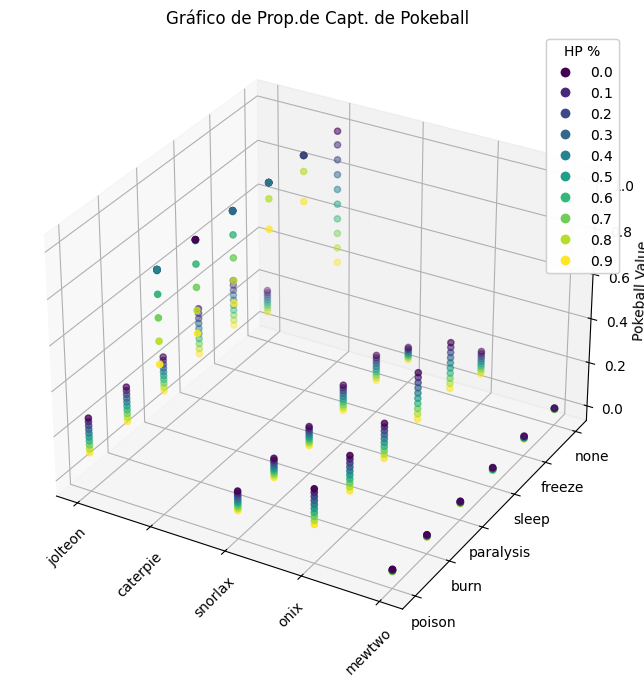

In [25]:
df_pokeball = dfg0[['pokemon_name','status','hp_percentage','pokeball']]
# Crea una figura 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Grafica los puntos
scatter = ax.scatter(df_pokeball['pokemon_name'], df_pokeball['status'], df_pokeball['pokeball'], c=df_pokeball['hp_percentage'], cmap='viridis')

# Configura los ejes
#ax.set_xlabel('Pokemon name')
#ax.set_ylabel('Status')
ax.set_zlabel('Pokeball Value',labelpad=1)
ax.set_title('Gráfico de Prop.de Capt. de Pokeball')

# Configurar etiquetas de los ejes
x_labels = pokemons
y_labels = ['poison','burn','paralysis','sleep','freeze','none']

# Agrega una leyenda para el color
legend = ax.legend(*scatter.legend_elements(), title='HP %')
ax.add_artist(legend)
# Configurar etiquetas de los ejes
ax.set_xticks(range(5))
ax.set_xticklabels(x_labels, rotation=45)
ax.set_yticks(range(6))
ax.set_yticklabels(y_labels)

# Muestra el gráfico
plt.show()


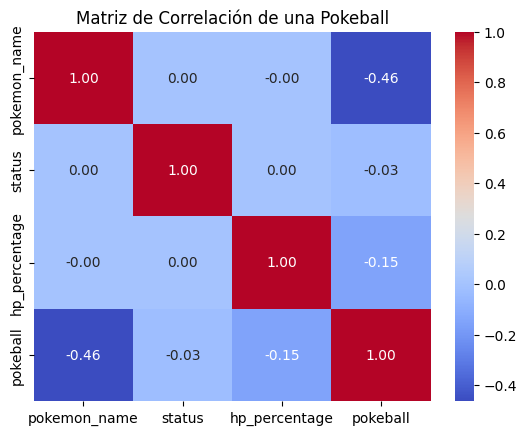

In [26]:
correlation_matrix = df_pokeball.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación de una Pokeball')
plt.show()

Se observa que el valor de probabilidad de captura una Pokeball (normal) esta correlacionada a la variabilidad del parámetro status.

* Analisis para UltraBall

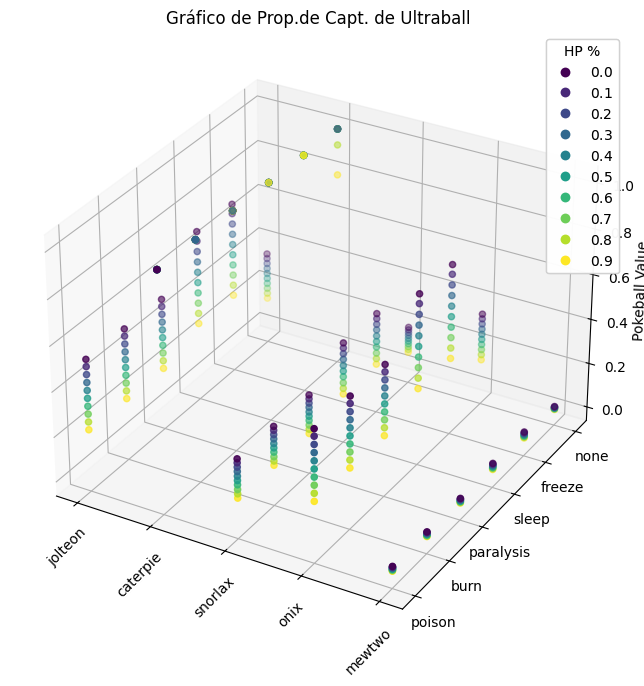

In [27]:
df_ultraball = dfg0[['pokemon_name','status','hp_percentage','ultraball']]
# Crea una figura 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Grafica los puntos
scatter = ax.scatter(df_ultraball['pokemon_name'], df_ultraball['status'], df_ultraball['ultraball'], c=df_ultraball['hp_percentage'], cmap='viridis')

# Configura los ejes
#ax.set_xlabel('Pokemon name')
#ax.set_ylabel('Status')
ax.set_zlabel('Pokeball Value',labelpad=1)
ax.set_title('Gráfico de Prop.de Capt. de Ultraball')

# Configurar etiquetas de los ejes
x_labels = pokemons
y_labels = ['poison','burn','paralysis','sleep','freeze','none']

# Agrega una leyenda para el color
legend = ax.legend(*scatter.legend_elements(), title='HP %')
ax.add_artist(legend)
# Configurar etiquetas de los ejes
ax.set_xticks(range(5))
ax.set_xticklabels(x_labels, rotation=45)
ax.set_yticks(range(6))
ax.set_yticklabels(y_labels)

# Muestra el gráfico
plt.show()


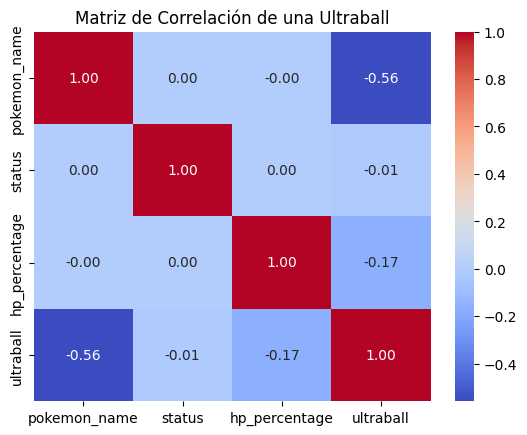

In [28]:
correlation_matrix = df_ultraball.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación de una Ultraball')
plt.show()

Se observa que el valor de probabilidad de captura una Ultraball está correlacionada a la variabilidad del parámetro status.

* Analisis para FastBall

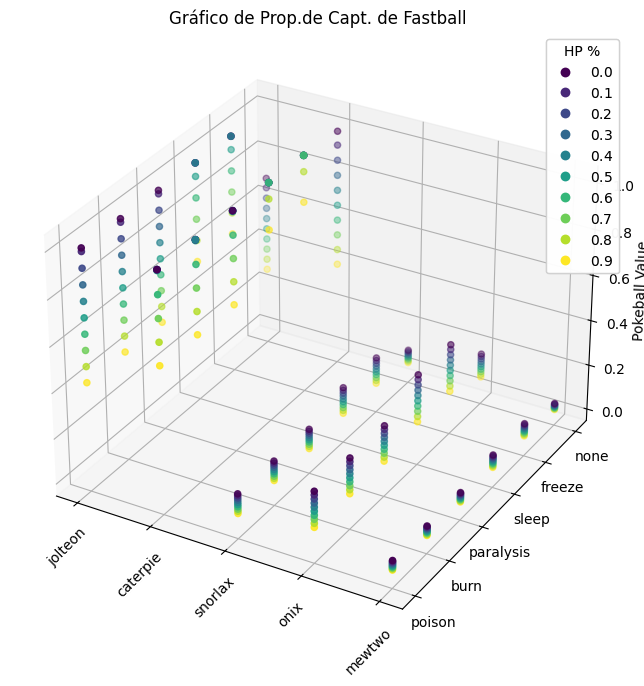

In [29]:
df_fastball = dfg0[['pokemon_name','status','hp_percentage','fastball']]
# Crea una figura 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Grafica los puntos
scatter = ax.scatter(df_fastball['pokemon_name'], df_fastball['status'], df_fastball['fastball'], c=df_fastball['hp_percentage'], cmap='viridis')

# Configura los ejes
#ax.set_xlabel('Pokemon name')
#ax.set_ylabel('Status')
ax.set_zlabel('Pokeball Value',labelpad=1)
ax.set_title('Gráfico de Prop.de Capt. de Fastball')

# Configurar etiquetas de los ejes
x_labels = pokemons
y_labels = ['poison','burn','paralysis','sleep','freeze','none']

# Agrega una leyenda para el color
legend = ax.legend(*scatter.legend_elements(), title='HP %')
ax.add_artist(legend)
# Configurar etiquetas de los ejes
ax.set_xticks(range(5))
ax.set_xticklabels(x_labels, rotation=45)
ax.set_yticks(range(6))
ax.set_yticklabels(y_labels)

# Muestra el gráfico
plt.show()


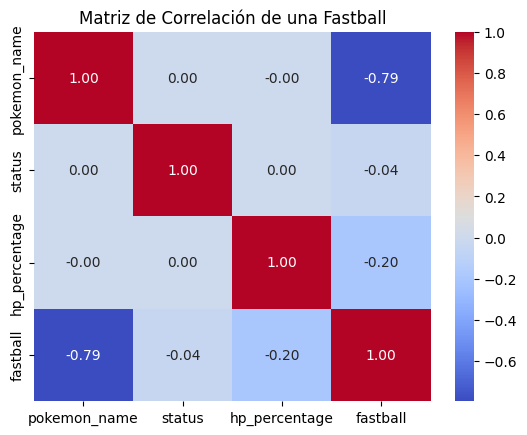

In [30]:
correlation_matrix = df_fastball.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación de una Fastball')
plt.show()

Se observa que el valor de probabilidad de captura una Fastball está correlacionada a la variabilidad del parámetro status.

* Analisis para HeavyBall

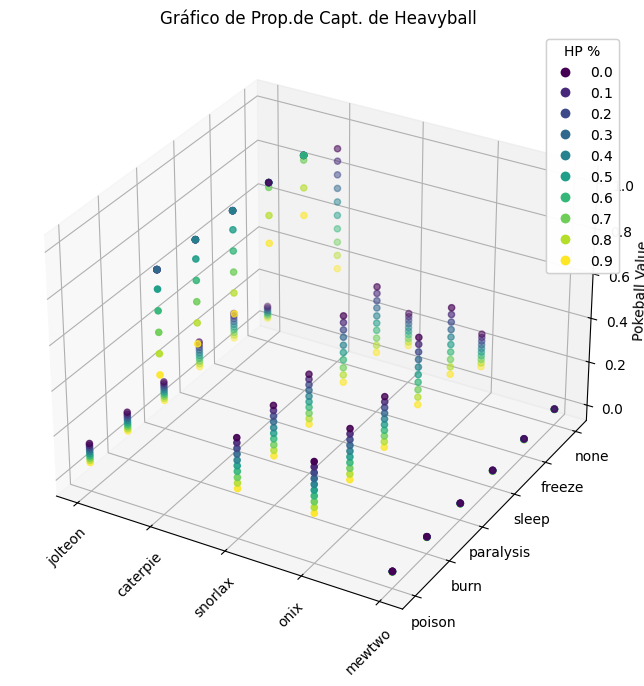

In [31]:
df_heavyball = dfg0[['pokemon_name','status','hp_percentage','heavyball']]
# Crea una figura 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Grafica los puntos
scatter = ax.scatter(df_heavyball['pokemon_name'], df_heavyball['status'], df_heavyball['heavyball'], c=df_heavyball['hp_percentage'], cmap='viridis')

# Configura los ejes
#ax.set_xlabel('Pokemon name')
#ax.set_ylabel('Status')
ax.set_zlabel('Pokeball Value',labelpad=1)
ax.set_title('Gráfico de Prop.de Capt. de Heavyball')

# Configurar etiquetas de los ejes
x_labels = pokemons
y_labels = ['poison','burn','paralysis','sleep','freeze','none']

# Agrega una leyenda para el color
legend = ax.legend(*scatter.legend_elements(), title='HP %')
ax.add_artist(legend)
# Configurar etiquetas de los ejes
ax.set_xticks(range(5))
ax.set_xticklabels(x_labels, rotation=45)
ax.set_yticks(range(6))
ax.set_yticklabels(y_labels)

# Muestra el gráfico
plt.show()


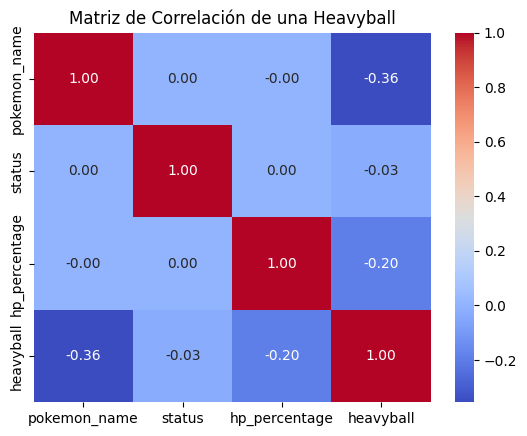

In [32]:
correlation_matrix = df_heavyball.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación de una Heavyball')
plt.show()

Se observa que el valor de probabilidad de captura una Heavyball está correlacionada a la variabilidad del parámetro status.

- d). Teniendo en cuenta uno o dos pokemones distintos: ¿Qué combinación de condiciones (propiedades mutables) y pokebola conviene utilizar para capturarlos?

        Propiedades mutables:
        - current_hp    : Vida actual
        - status_effect : Condición de salud
        - Level         : Nivel de experiencia

Analizando el código se observa que 'level' no afecta a la función de captura.

In [33]:
import warnings

# Filtrar todas las advertencias (desactivar todas las advertencias)
warnings.filterwarnings("ignore")

#Tenieno en cuenta la siguiente matriz en la que varia current_hp y status
df_total=pokeball_catch_rate5[['pokemon_name','status','hp_percentage','pokeball','ultraball','fastball','heavyball',]]


In [34]:
for p in pokemons:
    df_pokemon  = df_total[df_total['pokemon_name'] == p]
    # Calculamos el valor máximo entre las columnas 'pokeball', 'ultraball', 'fastball' y 'heavyball' para cada fila
    df_pokemon['max_value'] = df_pokemon[['pokeball', 'ultraball', 'fastball', 'heavyball']].max(axis=1)

    # Obtenemos el índice del valor máximo
    index_max = df_pokemon['max_value'].idxmax()

    # Obtenemos el nombre de la columna donde se encuentra el valor máximo
    column_max = df_pokemon[['pokeball', 'ultraball', 'fastball', 'heavyball']].idxmax(axis=1)
    column_max_name = column_max[index_max]

    # Mostramos los resultados
    print(f"++++++++ {p} +++++++++++++ ")
    print("Máxima probabilidad de captura:", df_pokemon.loc[index_max, 'max_value'])
    print("Pokebolla indicada:", column_max_name)
    print("Status:", df_pokemon.loc[index_max, 'status'],"Hp %:", df_pokemon.loc[index_max, 'hp_percentage'])

print("\n")

++++++++ jolteon +++++++++++++ 
Máxima probabilidad de captura: 1.0
Pokebolla indicada: fastball
Status: poison Hp %: 0.0
++++++++ caterpie +++++++++++++ 
Máxima probabilidad de captura: 1.0
Pokebolla indicada: pokeball
Status: poison Hp %: 0.0
++++++++ snorlax +++++++++++++ 
Máxima probabilidad de captura: 0.5048
Pokebolla indicada: heavyball
Status: sleep Hp %: 0.0
++++++++ onix +++++++++++++ 
Máxima probabilidad de captura: 0.6989
Pokebolla indicada: ultraball
Status: sleep Hp %: 0.0
++++++++ mewtwo +++++++++++++ 
Máxima probabilidad de captura: 0.0932
Pokebolla indicada: fastball
Status: sleep Hp %: 0.0




Se encontró que una fastball consiguio alta probabilidad de capturar dos pokemones distintos.

- e). A partir del punto anterior, ¿sería efectiva otra combinación de parámetros teniendo en cuenta un nivel del pokemon más bajo (o más alto)?

In [35]:
df_hp_menor  = df_total[df_total['hp_percentage'] <= 0.5]

for p in pokemons:
    df_pokemon  = df_hp_menor[df_hp_menor['pokemon_name'] == p]
    # Calculamos el valor máximo entre las columnas 'pokeball', 'ultraball', 'fastball' y 'heavyball' para cada fila
    df_pokemon['max_value'] = df_pokemon[['pokeball', 'ultraball', 'fastball', 'heavyball']].max(axis=1)

    # Obtenemos el índice del valor máximo
    index_max = df_pokemon['max_value'].idxmax()

    # Obtenemos el nombre de la columna donde se encuentra el valor máximo
    column_max = df_pokemon[['pokeball', 'ultraball', 'fastball', 'heavyball']].idxmax(axis=1)
    column_max_name = column_max[index_max]

    # Mostramos los resultados
    print(f"++++++++ {p} +++++++++++++ ")
    print("Máxima probabilidad de captura:", df_pokemon.loc[index_max, 'max_value'])
    print("Pokebolla indicada:", column_max_name)
    print("Status:", df_pokemon.loc[index_max, 'status'],"Hp %:", df_pokemon.loc[index_max, 'hp_percentage'])

print("\n")

++++++++ jolteon +++++++++++++ 
Máxima probabilidad de captura: 1.0
Pokebolla indicada: fastball
Status: poison Hp %: 0.0
++++++++ caterpie +++++++++++++ 
Máxima probabilidad de captura: 1.0
Pokebolla indicada: pokeball
Status: poison Hp %: 0.0
++++++++ snorlax +++++++++++++ 
Máxima probabilidad de captura: 0.5048
Pokebolla indicada: heavyball
Status: sleep Hp %: 0.0
++++++++ onix +++++++++++++ 
Máxima probabilidad de captura: 0.6989
Pokebolla indicada: ultraball
Status: sleep Hp %: 0.0
++++++++ mewtwo +++++++++++++ 
Máxima probabilidad de captura: 0.0932
Pokebolla indicada: fastball
Status: sleep Hp %: 0.0




In [36]:
df_hp_mayor  = df_total[df_total['hp_percentage'] > 0.5]
for p in pokemons:
    df_pokemon  = df_hp_mayor[df_hp_mayor['pokemon_name'] == p]
    # Calculamos el valor máximo entre las columnas 'pokeball', 'ultraball', 'fastball' y 'heavyball' para cada fila
    df_pokemon['max_value'] = df_pokemon[['pokeball', 'ultraball', 'fastball', 'heavyball']].max(axis=1)

    # Obtenemos el índice del valor máximo
    index_max = df_pokemon['max_value'].idxmax()

    # Obtenemos el nombre de la columna donde se encuentra el valor máximo
    column_max = df_pokemon[['pokeball', 'ultraball', 'fastball', 'heavyball']].idxmax(axis=1)
    column_max_name = column_max[index_max]

    # Mostramos los resultados
    print(f"++++++++ {p} +++++++++++++ ")
    print("Máxima probabilidad de captura:", df_pokemon.loc[index_max, 'max_value'])
    print("Pokebolla indicada:", column_max_name)
    print("Status:", df_pokemon.loc[index_max, 'status'],"Hp %:", df_pokemon.loc[index_max, 'hp_percentage'])

print("\n")

++++++++ jolteon +++++++++++++ 
Máxima probabilidad de captura: 0.8488
Pokebolla indicada: fastball
Status: sleep Hp %: 0.6000000000000001
++++++++ caterpie +++++++++++++ 
Máxima probabilidad de captura: 1.0
Pokebolla indicada: ultraball
Status: poison Hp %: 0.6000000000000001
++++++++ snorlax +++++++++++++ 
Máxima probabilidad de captura: 0.3071
Pokebolla indicada: heavyball
Status: sleep Hp %: 0.6000000000000001
++++++++ onix +++++++++++++ 
Máxima probabilidad de captura: 0.4219
Pokebolla indicada: ultraball
Status: sleep Hp %: 0.6000000000000001
++++++++ mewtwo +++++++++++++ 
Máxima probabilidad de captura: 0.0564
Pokebolla indicada: fastball
Status: sleep Hp %: 0.6000000000000001




Se observa que sin lugar a dudas un Hp % bajo constribuye a una mayor probabilidad de captura.